# Final 

ISE 530 Optimization Methods for Analytics Final

By: Chengyi (Jeff) Chen

In [1]:
%load_ext autotime
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams["figure.dpi"] = 300
# plt.rcParams["figure.figsize"] = (16, 12)

import operator
import pandas as pd
import numpy as np
import cvxpy as cp
import scipy as sp
from scipy import optimize
import functools
from graphviz import Digraph
import dot2tex
from IPython.display import Latex
from sympy import *
import re

<IPython.core.display.Javascript object>

---
## Question 1. 

Answer each question below with either a T(rue) or F(alse). For each statement, a correct answer gets 1 point, a wrong answer gets 0 point; there is no partial credit. (10 points)

(a) A basic solution of the constraints $[ Ax = b, x \geq 0 ]$ must be feasible. [True]

(b) The univariate function $e^{t^2}$ convex. [True]

\begin{align}
    \nabla_t e^{t^2} &= 2t e^{t^2} \\
    \nabla^2_t e^{t^2} &= 2 + 4t^2 e^{t^2} \\
\end{align}

Exponential of something that is always positive is convex.

(c) The univariate function $\log(1 + e^t)$ is concave. [True]

Log is a concave function.

(d) It is possible for a convex function to have a (unconstrained) strict local maximizer. [False]

(e) The matrix $\begin{bmatrix} 2 & -2 \\ -2 & 1 \end{bmatrix}$ is positive semidefinite. [False]

Indefinite matrix $\because$ one eigenvalue positive, one negative.

In [2]:
np.linalg.eigvals(np.array([[2, -2], [-2, 1]]))

array([ 3.56155281, -0.56155281])

time: 3.04 ms


<IPython.core.display.Javascript object>

(f) The difference of two convex functions is convex. [False]

Negative of convex function is concave. Sum is a convex operation. Hence it is a convex sum between a convex and concave function, we can't conclude that the resulting function is convex.

(g) The bivariate function $f(t_1, t_2) = \frac{1}{2}t^2_1 - t_1t_2 + t^2_2$ has a unique global minimizer. [True]

\begin{align}
    \nabla_t f(t_1, t_2) &= \begin{bmatrix} t_1 - t_2 \\ -t_1 + 2t_2 \end{bmatrix} \\
    \nabla^2_t f(t_1, t_2) &= \begin{bmatrix} 1 & -1 \\ -1 & 2 \\ \end{bmatrix} \\
\end{align}

Eigenvalues of Hessian are positive, meaning Hessian is positive definite and $\therefore$ function is strictly convex and has a unique global minimizer.

In [3]:
np.linalg.eigvals(np.array([[1, -1], [-1, 2]]))

array([0.38196601, 2.61803399])

time: 1.88 ms


<IPython.core.display.Javascript object>

(h) At the point $(1, 1)$, the active constraints among $x^2_1 + 2 x_2 \leq 3, x_2 \geq 1$, and $x_1 + x_2 = 2$ have linearly independent gradients. [False]

\begin{align}
    \nabla_x (x^2_1 + 2 x_2 \leq 3) &= \begin{bmatrix} 2x_1 \\ 2 \end{bmatrix} \\
    \nabla_x (x_2 \geq 1) &= \begin{bmatrix} 0 \\ -1 \end{bmatrix} \\
    \nabla_x (x_1 + x_2 = 2) &= \begin{bmatrix} 1 \\ 1 \end{bmatrix} \\
\end{align}

At $(1, 1)$, 1st and 3rd constraints are clearly a multiple of each other hence linearly dependent.

(i) For a linear program, the Karush-Kuhn-Tucker conditions are necessary and sufficient for global optimality. [True]

(j) The two constraints $x^2_1 + 2x_2 \leq 2$ and $x_2 \geq 1$ have a Slater point; i.e, a pair $(\bar{x_1}, \bar{x_2})$ satisfying both constraints strictly. [False]

Lowest $x^2_1$ can be is 0 as it is always non-negative. Any value above 1 for $x_2$ will make the first constraint infeasible, so no slater point exists.

---
## Question 2. 

Find the global minimizer of the problem: (10 points)

\begin{align}
    \underset{x, y}{\text{minimize}}\qquad& x^2 + 2xy + y^2 - \log(2+x^2+y^2) \\
    \text{subject to}\qquad&x,y \leq - 1 \text{ and } x+y = -4  \\
\end{align}

Verify that the solution you obtain satisfies the Karush-Kuhn-Tucker conditions by identifying the constraint multipliers. [Hint: there is an easy way to obtain the minimizer that requires no
calculation.

\begin{align}
    \underset{x, y}{\text{minimize}}\qquad& {(x + y)}^2 - \log(2+{(x + y)}^2 - 2xy) \\
    \text{subject to}\qquad&x,y \leq - 1 \text{ and } x+y = -4  \\
\end{align}

Substituting the $x+y = -4$ constraint:

\begin{align}
    \underset{x, y}{\text{minimize}}\qquad& 16 - \log(18 - 2xy) \\
    \text{subject to}\qquad&x,y \leq - 1 \text{ and } x+y = -4  \\
\end{align}

The $x, y$ values that make the objective the smallest while satisfying the constraints will be $x, y = -1, -3$.

KKT Conditions @ optimal $(x^*, y^*, \mu^*_1, \mu^*_2, \mu^*_3)$:

1. Primal Feasibility

\begin{align}
    x^* + 1 &\leq 0 \\
    y^* + 1 &\leq 0 \\
    x^* + y^* + 4 &= 0 \\
\end{align}

2. Dual Feasibility

\begin{align}
    \mu^*_1 &\geq 0 \\
    \mu^*_2 &\geq 0 \\
    \mu^*_3 &\text{ free}  \\
\end{align}

3. Complementary Slackness

\begin{align}
    \mu^*_1(x^* + 1) &= 0 \\
    \mu^*_2(y^* + 1) &= 0 \\
    \mu^*_3(x^* + y^* + 4) &= 0 \\
\end{align}

4. Stationarity

\begin{align}
    \nabla_x \mathcal{L}(x^*, y^*, \mu^*_1, \mu^*_2, \mu^*_3) &= 0 \\
    \nabla_x \Big[ {x^*}^2 + 2x^*y^* + {y^*}^2 - \log(2+{x^*}^2+{y^*}^2) + \mu^*_1(x^* + 1) + \mu^*_2(y^* + 1) + \mu^*_3(x^* + y^* + 4) \Big] &= 0 \\
    \begin{bmatrix}
        2x^* + 2y^* - \frac{2x^*}{2+{x^*}^2+{y^*}^2} + \mu^*_1 + \mu^*_3 \\
        2x^* + 2y^* - \frac{2y^*}{2+{x^*}^2+{y^*}^2} + \mu^*_2 + \mu^*_3 \\
    \end{bmatrix}
    &= 0 \\
\end{align}

Since we know $x^* = -1, y^* = -3$:

\begin{align}
    \begin{bmatrix}
        -2 - 6 + \frac{1}{6} + \mu^*_1 + \mu^*_3 \\
        -2 - 6 + \frac{1}{2} + \mu^*_2 + \mu^*_3 \\
    \end{bmatrix}
    &= 0 \\
    \mu^*_1 &= \frac{1}{3} + \mu^*_2 \\
\end{align}

$\mu^*_2 = 0$ from 2nd C.S. condition, $\mu^*_1 = \frac{1}{3}$, and $\mu^*_3 = -7.5$. Hence, KKT conditions satisfied.

---
## Question 3. 

The knapsack problem: (10 points)

\begin{align}
    \underset{x}{\text{maximize}}\qquad& 8x_1 + 11x_2 + 6x_3 + 4x_4 \\
    \text{subject to}\qquad& 6.7x_1 + 10x_2 + 5.5x_3 + 3.4x_4 \leq 19 \\
    \text{and }\qquad &x_j = 0\text{ or }1\text{, for all }j = 1\text{  through }4. \\
\end{align}

has an equivalent nonlinear programming formulation:

\begin{align}
    \underset{x}{\text{maximize}}\qquad& 8x_1 + 11x_2 + 6x_3 + 4x_4 \\
    \text{subject to}\qquad& 6.7x_1 + 10x_2 + 5.5x_3 + 3.4x_4 \leq 19 \\
    \text{and}\qquad& x_j(1-x_j)=0, 0\leq x_j \leq 1\text{ for all }j = 1,\text{  through }4. \\
\end{align}

(a) Write down the Karush-Kuhn-Tucker (KKT) conditions of the latter problem.

KKT Conditions @ optimal $(x^*_1, x^*_2, x^*_3, x^*_4, \mu^*_1, \mu^*_2, \mu^*_3, \mu^*_4, \mu^*_5, \mu^*_6, \mu^*_7, \mu^*_8, \mu^*_9, \mu^*_{10}, \mu^*_{11}, \mu^*_{12}, \mu^*_{13})$:

1. Primal Feasibility

\begin{align}
    6.7x^*_1 + 10x^*_2 + 5.5x^*_3 + 3.4x^*_4 - 19 &\leq 0 \\
    x^*_1(1 - x^*_1) &= 0 \\
    x^*_2(1 - x^*_2) &= 0 \\
    x^*_3(1 - x^*_3) &= 0 \\
    x^*_4(1 - x^*_4) &= 0 \\
    -x^*_1 &\leq 0 \\
    -x^*_2 &\leq 0 \\
    -x^*_3 &\leq 0 \\
    -x^*_4 &\leq 0 \\
    x^*_1 - 1 &\leq 0 \\
    x^*_2 - 1 &\leq 0 \\
    x^*_3 - 1 &\leq 0 \\
    x^*_4 - 1 &\leq 0 \\
\end{align}

2. Dual Feasibility

\begin{align}
    \mu^*_1 &\geq 0 \\
    \mu^*_2 &\text{ free}  \\
    \mu^*_3 &\text{ free}  \\
    \mu^*_4 &\text{ free}  \\
    \mu^*_5 &\text{ free}  \\
    \mu^*_6 &\geq 0 \\
    \mu^*_7 &\geq 0 \\
    \mu^*_8 &\geq 0 \\
    \mu^*_9 &\geq 0 \\
    \mu^*_{10} &\geq 0 \\
    \mu^*_{11} &\geq 0 \\
    \mu^*_{12} &\geq 0 \\
    \mu^*_{13} &\geq 0 \\
\end{align}

3. Complementary Slackness

\begin{align}
    \mu^*_1(6.7x^*_1 + 10x^*_2 + 5.5x^*_3 + 3.4x^*_4 - 19) &= 0 \\
    \mu^*_2(x^*_1(1 - x^*_1) &= 0 \\
    \mu^*_3(x^*_2(1 - x^*_2) &= 0 \\
    \mu^*_4(x^*_3(1 - x^*_3) &= 0 \\
    \mu^*_5(x^*_4(1 - x^*_4) &= 0 \\
    \mu^*_6(-x^*_1) &= 0 \\
    \mu^*_7(-x^*_2) &= 0 \\
    \mu^*_8(-x^*_3) &= 0 \\
    \mu^*_9(-x^*_4) &= 0 \\
    \mu^*_{10}(x^*_1 - 1) &= 0 \\
    \mu^*_{11}(x^*_2 - 1) &= 0 \\
    \mu^*_{12}(x^*_3 - 1) &= 0 \\
    \mu^*_{13}(x^*_4 - 1) &= 0 \\
\end{align}

4. Stationarity

\begin{align}
    \nabla_x \mathcal{L}(x^*_1, x^*_2, x^*_3, x^*_4, \mu^*_1, \mu^*_2, \mu^*_3, \mu^*_4, \mu^*_5, \mu^*_6, \mu^*_7, \mu^*_8, \mu^*_9, \mu^*_{10}, \mu^*_{11}, \mu^*_{12}, \mu^*_{13}) &= 0 \\
    \nabla_x \Big[ -8x^*_1 - 11x^*_2 - 6x^*_3 - 4x^*_4 + \mu^*_1(6.7x^*_1 + 10x^*_2 + 5.5x^*_3 + 3.4x^*_4 - 19) + \mu^*_2(x^*_1(1 - x^*_1) + \cdots + \mu^*_{13}(x^*_4 - 1) \Big] &= 0 \\
    \begin{bmatrix}
        -8 + 6.7\mu^*_1 + \mu^*_2 - 2\mu^*_2 x^*_1 - \mu^*_6 + \mu^*_{10} \\
        -11 + 10\mu^*_1 + \mu^*_3 - 2\mu^*_3 x^*_2 - \mu^*_7 + \mu^*_{11} \\
        -6 + 5.5\mu^*_1 + \mu^*_4 - 2\mu^*_4 x^*_3 - \mu^*_8 + \mu^*_{12} \\
        -4 + 3.4\mu^*_1 + \mu^*_5 - 2\mu^*_5 x^*_4 - \mu^*_9 + \mu^*_{13} \\
    \end{bmatrix}
    &= 0 \\
\end{align}

(b) Can the KKT conditions be satisfied by the optimal binary solution $x_1 = 0, x_2 = x_3 = x_4 = 1$? If yes, identify the constraint multipliers; otherwise, give a reason why not.

At $(x^*_1,x^*_2,x^*_3,x^*_4) = (0,1,1,1)$:

3. Complementary Slackness

\begin{align}
    \mu^*_1(10 + 5.5 + 3.4 - 19) = -0.1\mu^*_1 &= 0 \\
    \mu^*_2(0) &= 0 \\
    \mu^*_3(0) &= 0 \\
    \mu^*_4(0) &= 0 \\
    \mu^*_5(0) &= 0 \\
    \mu^*_6(0) &= 0 \\
    \mu^*_7(-1) &= 0 \\
    \mu^*_8(-1) &= 0 \\
    \mu^*_9(-1) &= 0 \\
    \mu^*_{10}(-1) &= 0 \\
    \mu^*_{11}(0) &= 0 \\
    \mu^*_{12}(0) &= 0 \\
    \mu^*_{13}(0) &= 0 \\
\end{align}

Hence, $\mu^*_1 = \mu^*_7 = \mu^*_8 = \mu^*_9 = \mu^*_{10} = 0$.

4. Stationarity

\begin{align}
    \begin{bmatrix}
        -8 + \mu^*_2 - \mu^*_6 \\
        -11 + \mu^*_3 - 2\mu^*_3 + \mu^*_{11} \\
        -6 + \mu^*_4 - 2\mu^*_4 + \mu^*_{12} \\
        -4 + \mu^*_5 - 2\mu^*_5 + \mu^*_{13} \\
    \end{bmatrix}
    &= 0 \\
    \mu^*_2 &= 8 + \mu^*_6 \\
    \mu^*_3 &= -11 + \mu^*_{11} \\
    \mu^*_4 &= -6 + \mu^*_{12} \\
    \mu^*_5 &= -4 + \mu^*_{13} \\
\end{align}

Since $\mu^*_2, \mu^*_3, \mu^*_4, \mu^*_5$ are free, we can set $\mu^*_6, \mu^*_{11}, \mu^*_{12}, \mu^*_{13} = 0$, leaving $\mu^*_2 = 8, \mu^*_3 = -11, \mu^*_4 = -6, \mu^*_5 = -4$, and $\mu^*_1 = \mu^*_7 = \mu^*_8 = \mu^*_9 = \mu^*_{10} = 0$. Hence, all KKT multipliers have been identified and KKT is satisfied.

---
## Question 4. 

Solve the knapsack problem in Question 3 by the branch-and-bound method. (10 points)

\begin{align}
    \underset{x}{\text{maximize}}\qquad& 8x_1 + 11x_2 + 6x_3 + 4x_4 \\
    \text{subject to}\qquad& 6.7x_1 + 10x_2 + 5.5x_3 + 3.4x_4 \leq 19 \\
    \text{and }\qquad &0 \leq x_j \leq 1 \text{ and integer for all }j = 1\text{  through }4. \\
\end{align}

In [4]:
# Converts the optimization problem parameters into the mathematical representation
def solve_lp(x, constraints, obj_coeff, problem_type):
    """Solves the standard LP maximization problem and creates the 
    mathematical formulation of optimization label for graphviz
    """
    obj = cp.Maximize(obj_coeff @ x)
    prob = cp.Problem(obj, constraints)
    prob.solve()

    label = (
        f"{problem_type} {' + '.join([str(coeff) + 'x' + str(i+1) for coeff, i in zip(obj_coeff, range(x.shape[0]))])} "
        + "\nsubject to: \n"
        + "{}".format(
            "\n".join(
                [
                    re.sub(
                        r"x\[([0-9]*)\]",
                        "x"
                        + str(
                            int(
                                re.search(
                                    r"\[[0-9]*\]",
                                    re.sub(r"var[0-9]*", "x", str(constraint)),
                                )
                                .group()
                                .replace("]", "")
                                .replace("[", "")
                            )
                            + 1
                        ),
                        re.sub(r"var[0-9]*", "x", str(constraint)),
                    )
                    if re.search(
                        r"x\[([0-9]*)\]", re.sub(r"var[0-9]*", "x", str(constraint))
                    )
                    is not None
                    else re.sub(r"var[0-9]*", "x", str(constraint))
                    for constraint in constraints
                ]
            )
        )
        + (
            "\n\nObjective Value: "
            + (
                str(np.round(prob.value, 2))
                if prob.status == "optimal"
                else str(prob.value)
            )
            + "\nSolution: "
            + (
                str([np.round(x_i, 2) for x_i in x.value])
                if prob.status == "optimal"
                else prob.status
            )
        )
    )
    return label, prob


# Checks if the number is an integer within specified decimal rounding
is_integer = lambda x, decimals=3: np.round(x, decimals).is_integer()

# Checks if all elements in array are integers
is_integer_solution = lambda x: np.alltrue([is_integer(x_i) for x_i in x])


def branch_and_bound_dfs(root, x, constraints, obj_coeff, problem_type):
    """Iterative DFS traversal of branch and bound tree"""

    node_id = "root"  # ID to map the node of branch and bound tree to the constraints
    stack = (
        []
    )  # To simulate depth first traversal by appending onto stack the node's children
    node_constraints = (
        {}
    )  # A map of the node_id to constraints associated with the node
    visited = []  # A list to keep the nodes already visited

    stack.append((node_id, None))
    node_constraints[node_id] = constraints

    lb, ub = None, None  # Lower bound and upper bound of ILP

    while len(stack) > 0:

        # Visit node
        node_id, parent_node_id = stack.pop()
        visited.append(node_id)

        # Process Root
        label, prob = solve_lp(x, node_constraints[node_id], obj_coeff, problem_type)
        root.node(name=str(node_id), label=label)

        # Add Edge
        if node_id != "root":
            root.edge(
                tail_name=str(parent_node_id),
                head_name=str(node_id),
                label=re.sub(
                    r"x\[([0-9]*)\]",
                    "x"
                    + str(
                        int(
                            re.search(
                                r"\[[0-9]*\]",
                                re.sub(
                                    r"var[0-9]*",
                                    "x",
                                    str(node_constraints[node_id][-1]),
                                ),
                            )
                            .group()
                            .replace("]", "")
                            .replace("[", "")
                        )
                        + 1
                    ),
                    re.sub(r"var[0-9]*", "x", str(node_constraints[node_id][-1])),
                ),
                len="5",
            )

        if prob.status == "optimal":

            # If current solution is integer
            is_integer_current_solution = is_integer_solution(
                np.array(list(prob.solution.primal_vars.values())).flatten()
            )

            # Break Conditions
            if is_integer_current_solution and (
                (ub is None) or (prob.value == np.floor(ub.value))
            ):  # Optimal Integer solution found
                return root, prob

            # Set lower bound of the ilp
            if is_integer_current_solution and (
                (lb is None) or (prob.value > lb.value)
            ):
                lb = prob

            # Set upper bound of the ilp
            if (ub is None) or (prob.value > ub.value):
                ub = prob

            if (
                prob.value > lb.value if lb is not None else True
            ) and not is_integer_current_solution:

                # Find non-integer value of solution
                largest_nonint_idx, largest_nonint_val = sorted(
                    [
                        (idx, x_i)
                        for idx, x_i in enumerate(prob.variables()[0].value)
                        if not is_integer(x_i)
                    ],
                    key=lambda x: x[1],
                    reverse=True,
                )[0]

                # Add left and right children nodes for processing
                stack.append((node_id + " -> left", node_id))
                node_constraints[node_id + " -> left"] = node_constraints[node_id] + [
                    x[largest_nonint_idx] >= np.ceil(largest_nonint_val)
                ]
                stack.append((node_id + " -> right", node_id))
                node_constraints[node_id + " -> right"] = node_constraints[node_id] + [
                    x[largest_nonint_idx] <= np.floor(largest_nonint_val)
                ]

    return root, lb


def branch_and_bound_ilp(x, constraints, obj_coeff, problem_type):
    """Solves Pure Integer Linear Program using
    Branch and Bound method.
    
    Args:
        x (cvxpy.Variable): The integer variables in our problem
        constraints (List[Inequality]): List of inequality constraints to impose on problem
        obj_coeff (numpy.array): The objective coefficients for a linear program
        problem_type (str): Either min, or max (default - min)
        
    Returns:
        
    
    """
    assert (problem_type == "min") or (problem_type == "max"), print(
        "problem_type must be either `min` or `max`."
    )
    # Standardize the optimization problem to be maximization
    if problem_type == "min":
        obj_coeff = -obj_coeff

    # Run the recursive depth-first branch and bound algo
    root = Digraph(
        name="Branch and Bound Tree",
        filename="btree.gv",
        node_attr={"shape": "record", "height": ".1"},
    )
    root.attr("node", shape="box")
    root, prob = branch_and_bound_dfs(root, x, constraints, obj_coeff, problem_type)
    print(
        f"Optimal Objective Value: {np.round(prob.value, 3)} | Integer Solution: {np.round(np.array(list(prob.solution.primal_vars.values())).flatten(), 3)}"
    )
    root.attr(label=r"\n\nBranch and Bound Tree")
    root.attr(fontsize="20")

    display(root)

time: 7.1 ms


<IPython.core.display.Javascript object>

---
## Question 4. 

Solve the knapsack problem in Question 3 by the branch-and-bound method. (10 points)

\begin{align}
    \underset{x}{\text{maximize}}\qquad& 8x_1 + 11x_2 + 6x_3 + 4x_4 \\
    \text{subject to}\qquad& 6.7x_1 + 10x_2 + 5.5x_3 + 3.4x_4 \leq 19 \\
    \text{and }\qquad &0 \leq x_j \leq 1 \text{ and integer for all }j = 1\text{  through }4. \\
\end{align}

Optimal Objective Value: 21.0 | Integer Solution: [-0.  1.  1.  1.]


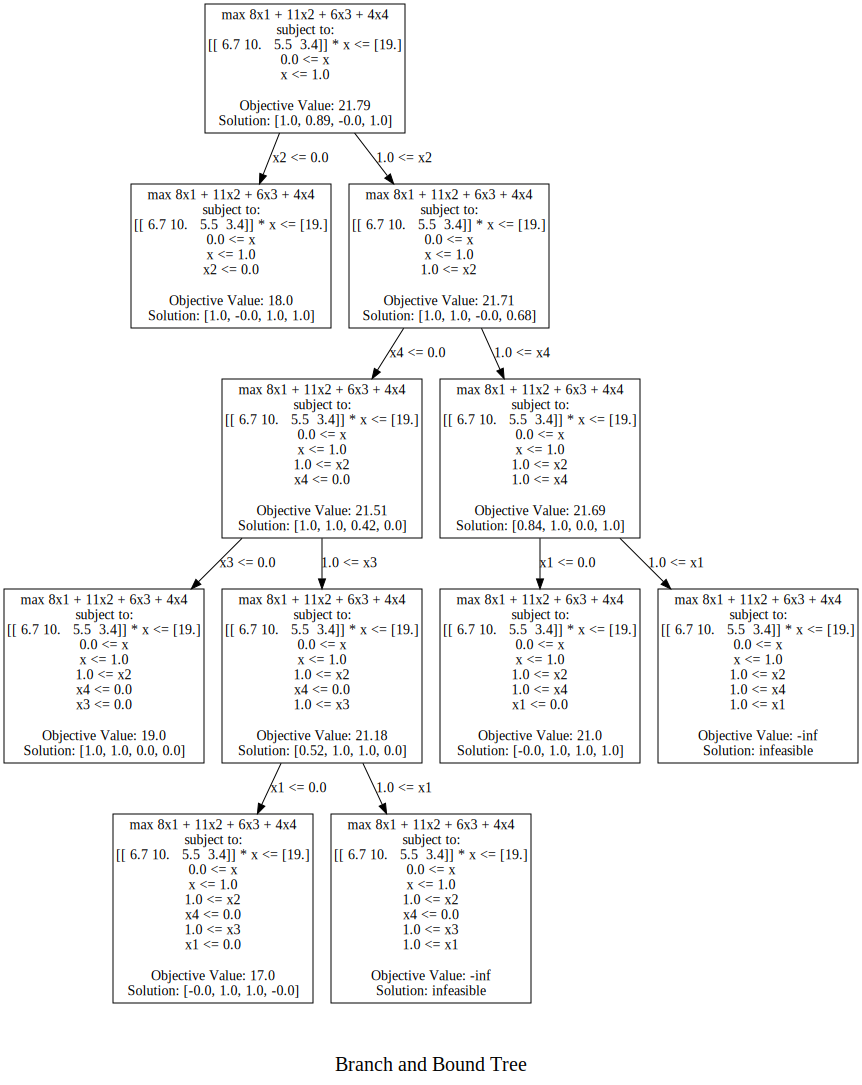

time: 452 ms


<IPython.core.display.Javascript object>

In [5]:
x = cp.Variable((4,), integer=False)
branch_and_bound_ilp(
    x=x,
    constraints=[
        np.array([[6.7, 10, 5.5, 3.4]]) @ x <= np.array([19]),
        x >= 0,
        x <= 1,
    ],
    obj_coeff=np.array([8, 11, 6, 4]),
    problem_type="max",
)

In [6]:
# Sanity Check
x = cp.Variable((4,), integer=True)
constraints = [
    np.array([[6.7, 10, 5.5, 3.4]]) @ x <= np.array([19]),
    x >= 0,
    x <= 1,
]
obj = cp.Maximize(np.array([8, 11, 6, 4]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Integer Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Integer Linear Programming Solution
Status: optimal
The optimal value is: 21.0
The optimal solution is: x = [0.0, 1.0, 1.0, 1.0]
time: 9.82 ms


<IPython.core.display.Javascript object>